In [2]:
%matplotlib inline
from pylab import *
import cv2
from glob import glob
from image_defs import *
import os

In [3]:
board_picture_folder='images/Robot Pics 2/'
square_images_folder='images/Robot Pics 2 squares'
image_to_use_for_corners="images/Robot Pics 2/image_filename50.jpg"

corners= array([[ 425.,   52.],
       [1205.,   30.],
       [1270.,  849.],
       [ 373.,  862.]], dtype=float32) 


In [4]:
board_filenames=sorted(glob(board_picture_folder+"/*.jpg"))
print(len(board_filenames))

6


## Look at all the boards

image_filename50.jpg
image_filename51.jpg
image_filename52.jpg
image_filename53.jpg
image_filename54.jpg
image_filename55.jpg


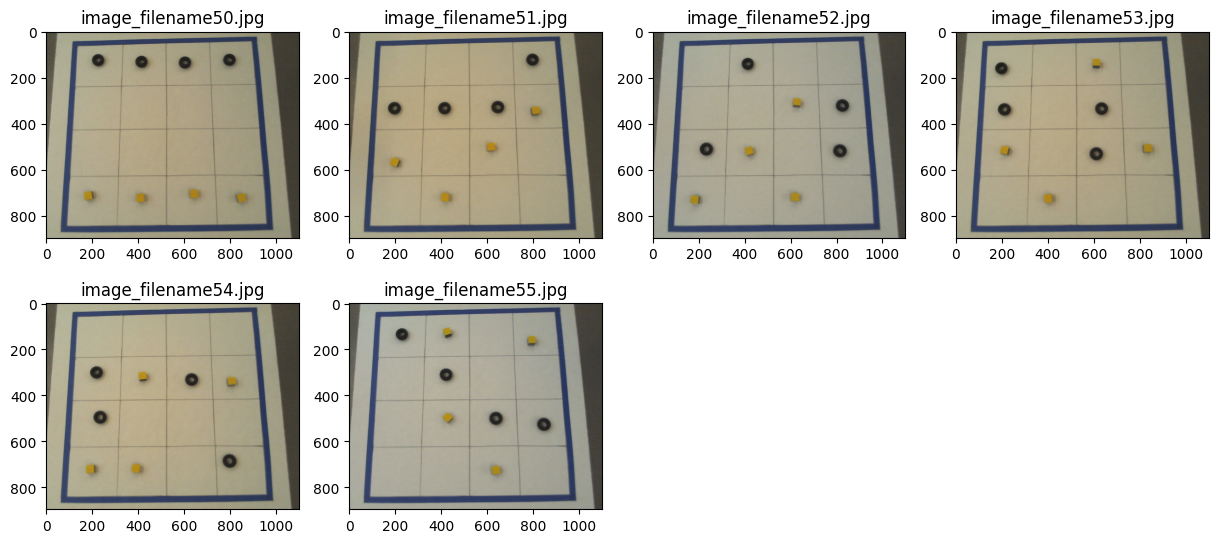

In [5]:
count=1
figure(figsize=(15,10))
for filename in board_filenames:
    subplot(3,4,count)

    image=imread(filename)
    image=image[:,300:1400]  # truncate if you need to
    
    imshow(image)

    
    base,name=os.path.split(filename)
    title(name)
    print(name)
    count+=1

In [6]:
board_states={
    'image_filename50.jpg': '1111/0000/0000/2222',
    'image_filename51.jpg': '0001/1112/2020/0200',
    'image_filename52.jpg': '0100/0021/1201/2020',
    'image_filename53.jpg': '1020/1010/2012/0200',
    'image_filename54.jpg': '0000/1212/1000/2201',
    'image_filename55.jpg': '1202/0100/0211/0020',
}

In [7]:
from Game import *

Version:  0.3.13


images/Robot Pics 2//image_filename50.jpg 1111/0000/0000/2222
Making folder images/Robot Pics 2 squares
Making folder images/Robot Pics 2 squares/piece_1
images/Robot Pics 2 squares/piece_1/square0_1.jpg
images/Robot Pics 2 squares/piece_1/square1_1.jpg
images/Robot Pics 2 squares/piece_1/square2_1.jpg
images/Robot Pics 2 squares/piece_1/square3_1.jpg
Making folder images/Robot Pics 2 squares/piece_0
images/Robot Pics 2 squares/piece_0/square4_0.jpg
images/Robot Pics 2 squares/piece_0/square5_0.jpg
images/Robot Pics 2 squares/piece_0/square6_0.jpg
images/Robot Pics 2 squares/piece_0/square7_0.jpg
images/Robot Pics 2 squares/piece_0/square8_0.jpg
images/Robot Pics 2 squares/piece_0/square9_0.jpg
images/Robot Pics 2 squares/piece_0/square10_0.jpg
images/Robot Pics 2 squares/piece_0/square11_0.jpg
Making folder images/Robot Pics 2 squares/piece_2
images/Robot Pics 2 squares/piece_2/square12_2.jpg
images/Robot Pics 2 squares/piece_2/square13_2.jpg
images/Robot Pics 2 squares/piece_2/square

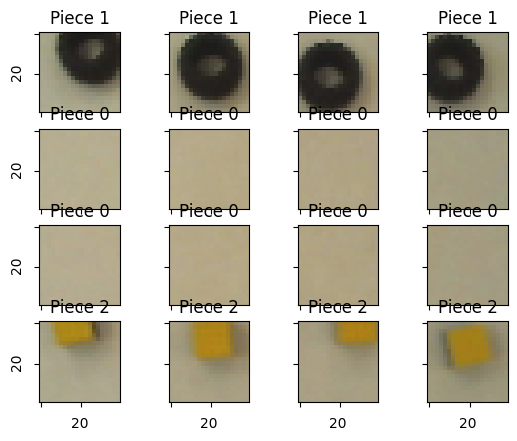

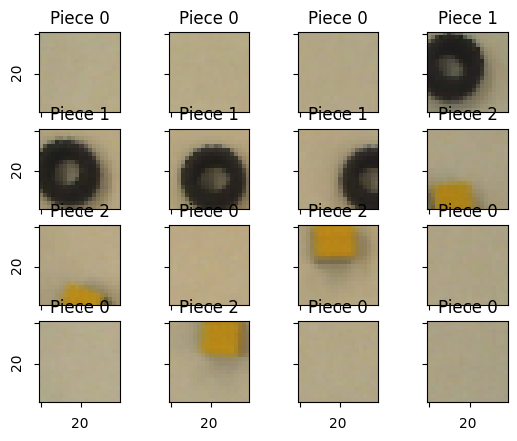

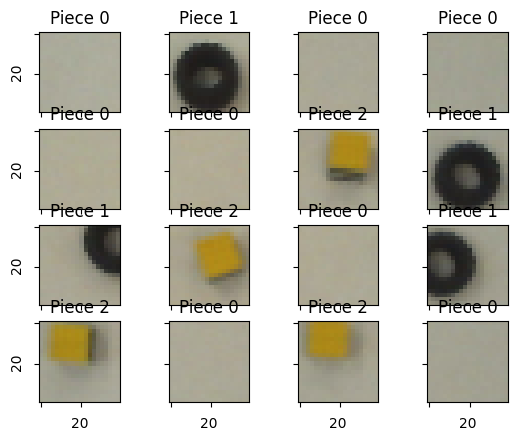

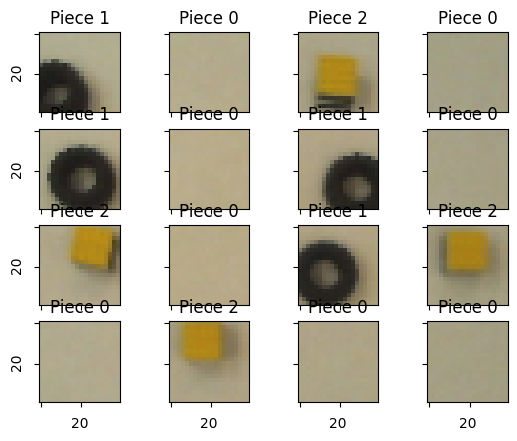

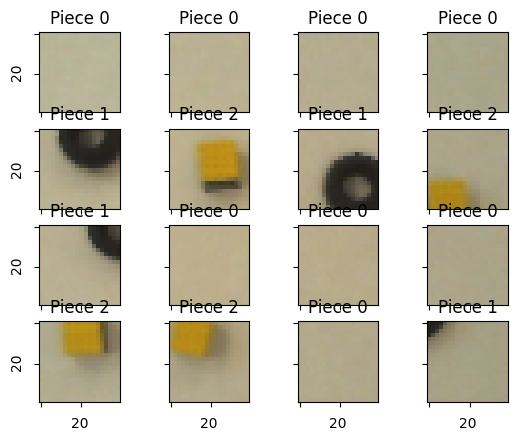

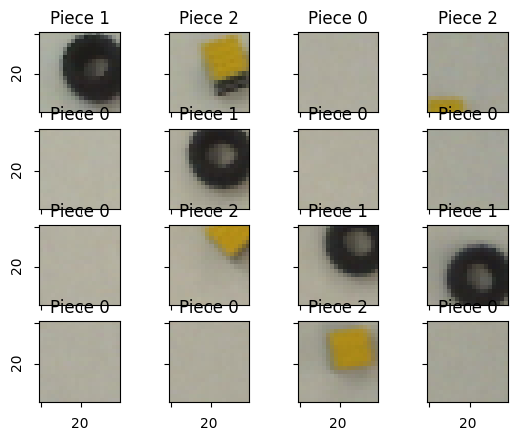

In [8]:
count=0
for name in board_states:
    filename=board_picture_folder+"/"+name
    board_string=board_states[name]
    
    state=Board(board_string)
    print(filename,board_string)
    image=imread(filename)

    # these 5 lines are specific to your image
    im3=straighten_image(image,corners)

    squares=get_board_squares_from_image(im3,
                                     state.shape,
                                     middle_pixels=20)  # <=== check this
    


    if not os.path.exists(square_images_folder):
        print(f"Making folder {square_images_folder}")
        os.mkdir(square_images_folder)
    
    
    nr,nc=state.shape
    saveit=True

    figure()
    plot_count=0
    for r in range(nr):
        for c in range(nc):
    
            subplot(nr,nc,plot_count+1)
            imshow(squares[plot_count])
    
            shape=squares[plot_count].shape
            piece=state.board[plot_count]
            
            title(f"Piece {piece}")
            if c==0:
                ylabel(shape[0])
    
            if r==nr-1:
                xlabel(shape[1])
            gca().set_xticklabels([])
            gca().set_yticklabels([])
    
    
            if saveit:
                piece_folder=f"{square_images_folder}/piece_{piece}"
                if not os.path.exists(piece_folder):
                    print(f"Making folder {piece_folder}")
                    os.mkdir(piece_folder)
                
                fname=f"{piece_folder}/square{count}_{piece}.jpg"
                print(fname)
                imsave(fname,squares[plot_count])
            
            
            plot_count+=1  
            count+=1


